<a href="https://www.kaggle.com/code/kaixiongf/company-bankruptcy-w-pycaret?scriptVersionId=105831850" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Table Of Contents**
​
* [1. Introduction](#section-one)
* [2. Understanding Shape of Data](#section-two)
* [3. Data Cleaning and Exploration](#section-three)
    - [3.1 Missing Values and Cleaning](#subsection-three.one)
    - [3.2 Distribution of all Features](#subsection-three.one)
    - [3.3 Sub Sampling](#subsection-three.one)
* [4. Feature Engineering](#section-four)
    - [4.1 Correlation/Heatmap](#subsection-four.one)
    - [4.2 Distribution of Features after sub-sampling](#subsection-four.two)
    - [4.3 Boxplot](#subsection-four.three)
    - [4.4 IQR Outlier removal](#subsection-four.four)
    - [4.5 Distribution of Features After Outlier Removal](#subsection-four.four)
    - [4.6 Boxplot After Outlier Removal](#subsection-four.four)
* [5. Data Preprocessing](#section-five)
    - [5.1 Feature Encoding](#subsection-four.one)
    - [5.2 Log Transform Skewed data](#subsection-four.one)
    - [5.3 Feature Scaling](#subsection-four.one)
* [6. Model Building with Pycaret](#section-six)
* [7. Model Tuning with Pycaret](#section-seven)
* [9. Model Verification with Pycaret](#section-nine)
* [10. Discussion on Results and Models](#section-nine)
* [11. Thoughts on Pycaret](#section-nine)
* [Conclusion](#section-ten)

**Would Appreciate and Upvote! Thank you**

# **1. Introduction**

This notebook is to explore the data collected from the Taiwan Economic Journal for the years 1999 to 2009 and to see what insight can be generated during data exploration and which model is able to predict company bankruptcy most accurately.

Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

## Setting Up the Environment

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bankruptcy_df = pd.read_csv("../input/company-bankruptcy-prediction/data.csv")
bankruptcy_df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

# **2. Understanding the Shape of Data**

In [3]:
bankruptcy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
bankruptcy_df.shape

(6819, 96)

In [5]:
bankruptcy_df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

# **3. Data Cleaning and Exploration**

## **3.1 Missing Values and Cleaning**

In [6]:
bankruptcy_df.columns[bankruptcy_df.isna().any()]

Index([], dtype='object')

Great! No missing values

In [7]:
# Adjust column names
def clean_col_names(col_name):
    col_name = (
        col_name.strip()
        .replace("?", "_")
        .replace("(", "_")
        .replace(")", "_")
        .replace(" ", "_")
        .replace("/", "_")
        .replace("-", "_")
        .replace("__", "_")
        .replace("'", "")
        .lower()
    )
    return col_name

In [8]:
bank_columns = list(bankruptcy_df.columns)
bank_columns = [clean_col_names(col_name) for col_name in bank_columns]
bankruptcy_df.columns = bank_columns
display(bankruptcy_df.columns)

Index(['bankrupt_', 'roa_c_before_interest_and_depreciation_before_interest',
       'roa_a_before_interest_and_%_after_tax',
       'roa_b_before_interest_and_depreciation_after_tax',
       'operating_gross_margin', 'realized_sales_gross_margin',
       'operating_profit_rate', 'pre_tax_net_interest_rate',
       'after_tax_net_interest_rate',
       'non_industry_income_and_expenditure_revenue',
       'continuous_interest_rate_after_tax_', 'operating_expense_rate',
       'research_and_development_expense_rate', 'cash_flow_rate',
       'interest_bearing_debt_interest_rate', 'tax_rate_a_',
       'net_value_per_share_b_', 'net_value_per_share_a_',
       'net_value_per_share_c_', 'persistent_eps_in_the_last_four_seasons',
       'cash_flow_per_share', 'revenue_per_share_yuan_¥_',
       'operating_profit_per_share_yuan_¥_',
       'per_share_net_profit_before_tax_yuan_¥_',
       'realized_sales_gross_profit_growth_rate',
       'operating_profit_growth_rate', 'after_tax_net_profit

<AxesSubplot:xlabel='bankrupt_', ylabel='count'>

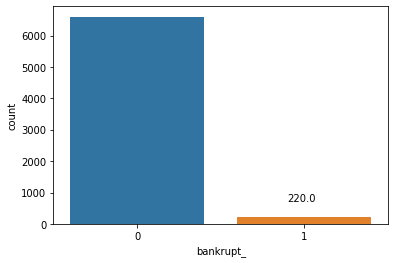

In [9]:
class_bar=sns.countplot(data=bankruptcy_df,x="bankrupt_")
ax = plt.gca()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500))
class_bar

## 3.2 Distribution of All Features

* Checking for skews

In [10]:
# Return true/false if skewed
import scipy.stats
skew_df = pd.DataFrame(bankruptcy_df.select_dtypes(np.number).columns, columns = ['Feature'])

skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(bankruptcy_df[feature])) 

skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)  # to obtain magnitude of skew irrelevant of direction
skew_df['Skewed']= skew_df['Absolute Skew'].apply(lambda x: True if x>= 0.5 else False)
with pd.option_context("display.max_rows", 1000):
    display(skew_df)

Feature       Skew  \
0                                           bankrupt_   5.294223   
1   roa_c_before_interest_and_depreciation_before_...  -0.323870   
2               roa_a_before_interest_and_%_after_tax  -1.033499   
3    roa_b_before_interest_and_depreciation_after_tax  -0.763396   
4                              operating_gross_margin  -8.041599   
5                         realized_sales_gross_margin  -8.064798   
6                               operating_profit_rate -70.221713   
7                           pre_tax_net_interest_rate -52.471321   
8                         after_tax_net_interest_rate -52.984085   
9         non_industry_income_and_expenditure_revenue  39.632969   
10                continuous_interest_rate_after_tax_ -53.188417   
11                             operating_expense_rate   1.248399   
12              research_and_development_expense_rate   1.281761   
13                                     cash_flow_rate   3.989708   
14                interest_bearing_debt_interest_rate   7.031830   
15                                        tax_rate_a_   1.903456   
16                             net_value_per_share_b_   4.561319   
17                             net_value_per_share_a_   4.517138   
18                             net_value_per_share_c_   4.512748   
19            persistent_eps_in_the_last_four_seasons   5.134833   
20                                cash_flow_per_share   8.017219   
21                          revenue_per_share_yuan_¥_  43.759470   
22                 operating_profit_per_share_yuan_¥_   8.809917   
23            per_share_net_profit_before_tax_yuan_¥_   6.001270   
24            realized_sales_gross_profit_growth_rate  77.907967   
25                       operating_profit_growth_rate -71.673180   
26                   after_tax_net_profit_growth_rate -25.577739   
27                     regular_net_profit_growth_rate -25.257283   
28                  continuous_net_profit_growth_rate  67.082774   
29                            total_asset_growth_rate  -0.918589   
30                              net_value_growth_rate  80.274181   
31               total_asset_return_growth_rate_ratio  62.486212   
32                                cash_reinvestment_%   2.317734   
33                                      current_ratio  82.559071   
34                                        quick_ratio  31.637952   
35                             interest_expense_ratio -16.818853   
36                         total_debt_total_net_worth  46.345138   
37                                       debt_ratio_%   0.980580   
38                                   net_worth_assets  -0.980580   
39                long_term_fund_suitability_ratio_a_  24.962380   
40                               borrowing_dependency  20.834307   
41                   contingent_liabilities_net_worth  79.653094   
42                   operating_profit_paid_in_capital   8.947418   
43              net_profit_before_tax_paid_in_capital   6.378022   
44        inventory_and_accounts_receivable_net_value  13.109350   
45                               total_asset_turnover   2.340392   
46                       accounts_receivable_turnover  25.840861   
47                            average_collection_days  30.573359   
48                     inventory_turnover_rate_times_   1.137038   
49                    fixed_assets_turnover_frequency   2.349286   
50                     net_worth_turnover_rate_times_   8.959877   
51                                 revenue_per_person  59.421405   
52                        operating_profit_per_person   7.786586   
53                         allocation_rate_per_person  27.470100   
54                    working_capital_to_total_assets  -0.192269   
55                          quick_assets_total_assets   0.337240   
56                        current_assets_total_assets   0.075874   
57                                  cash_total_assets   2.229870   
58                     quick_asset

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


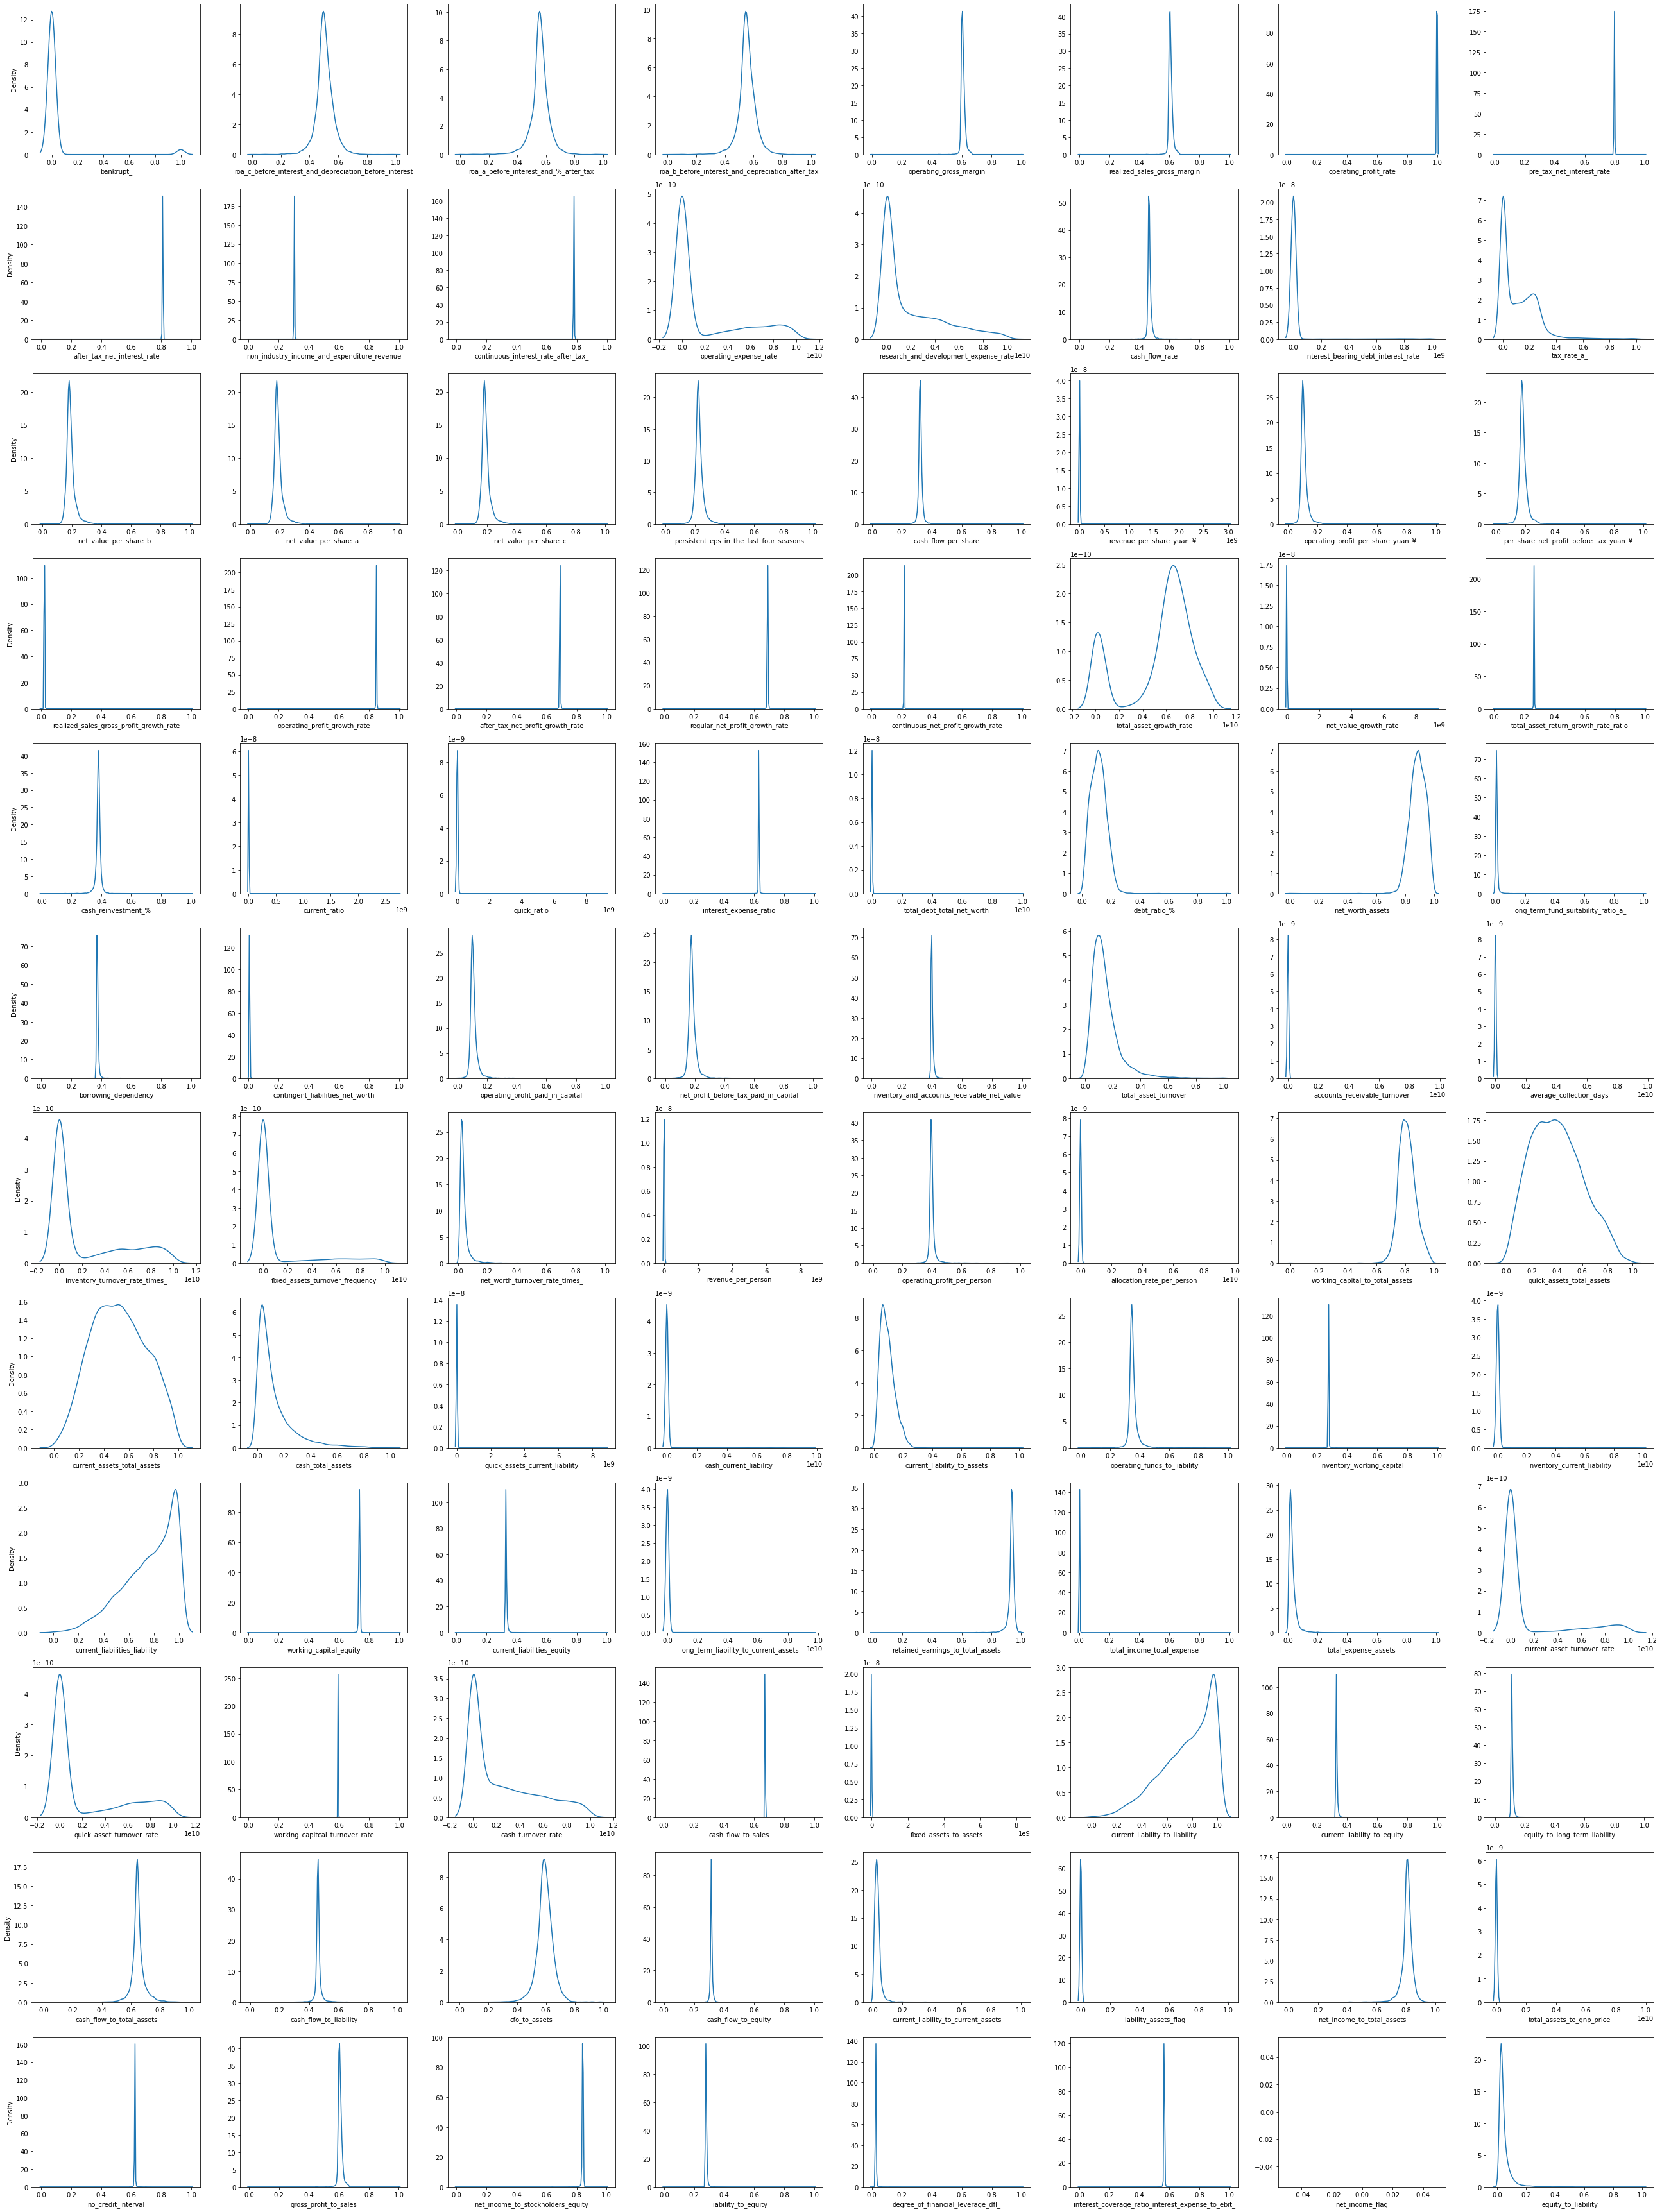

In [11]:
# Visualisation of distributions
cols = list(bankruptcy_df.columns)
ncols = 8
nrows = math.ceil(len(cols) / ncols)

fig, ax = plt.subplots(nrows, ncols, figsize = (4.5 * ncols, 4 * nrows))
for i in range(len(cols)):
    sns.kdeplot(bankruptcy_df[cols[i]], ax = ax[i // ncols, i % ncols])
    if i % ncols != 0:
        ax[i // ncols, i % ncols].set_ylabel(" ")
plt.tight_layout()
plt.show()

In [12]:
query_skew=skew_df.query("Skewed == True")["Feature"]
with pd.option_context("display.max_rows", 1000):
    display(query_skew)

0                                             bankrupt_
2                 roa_a_before_interest_and_%_after_tax
3      roa_b_before_interest_and_depreciation_after_tax
4                                operating_gross_margin
5                           realized_sales_gross_margin
6                                 operating_profit_rate
7                             pre_tax_net_interest_rate
8                           after_tax_net_interest_rate
9           non_industry_income_and_expenditure_revenue
10                  continuous_interest_rate_after_tax_
11                               operating_expense_rate
12                research_and_development_expense_rate
13                                       cash_flow_rate
14                  interest_bearing_debt_interest_rate
15                                          tax_rate_a_
16                               net_value_per_share_b_
17                               net_value_per_share_a_
18                               net_value_per_s

**Sub-sample dataset where bankrupt vs non bankrupt is 50/50, after which check for skews an decide if log transform is required, additionally conduct a correlation matrix analysis**

## **3.3 Subsampling**

Sub-sample dataset where bankrupt vs non bankrupt is 50/50

In [13]:
bankruptcy_df2 = bankruptcy_df.sample(frac=1) #Shuffle Bankruptcy df

bankruptcy_df_b = bankruptcy_df2.loc[bankruptcy_df2["bankrupt_"] == 1]
bankruptcy_df_nb = bankruptcy_df2.loc[bankruptcy_df2["bankrupt_"] == 0][:220]

bankruptcy_subdf_comb = pd.concat([bankruptcy_df_b,bankruptcy_df_nb])
bankruptcy_subdf = bankruptcy_subdf_comb.sample(frac=1,random_state=42)

bankruptcy_subdf

bankrupt_  roa_c_before_interest_and_depreciation_before_interest  \
4451          0                                           0.525033        
1870          1                                           0.277726        
5858          0                                           0.548871        
731           0                                           0.525228        
1089          0                                           0.561303        
...         ...                                                ...        
4             1                                           0.465022        
1376          0                                           0.566080        
5427          0                                           0.528007        
5591          0                                           0.558231        
3596          1                                           0.480915        

      roa_a_before_interest_and_%_after_tax  \
4451                               0.593109   
1870                               0.314708   
5858                               0.613389   
731                                0.587386   
1089                               0.603740   
...                                     ...   
4                                  0.538432   
1376                               0.590384   
5427                               0.579154   
5591                               0.588803   
3596                               0.546936   

      roa_b_before_interest_and_depreciation_after_tax  \
4451                                          0.580010   
1870                                          0.307351   
5858                                          0.605439   
731                                           0.578564   
1089                                          0.601852   
...                                                ...   
4                                             0.522298   
1376                                          0.613630   
5427                                          0.572996   
5591                                          0.593233   
3596                                          0.529097   

      operating_gross_margin  realized_sales_gross_margin  \
4451                0.599519                     0.599713   
1870                0.596621                     0.596650   
5858                0.599324                     0.599338   
731                 0.605385                     0.605385   
1089                0.613867                     0.613838   
...                      ...                          ...   
4                   0.598783                     0.598783   
1376                0.613543                     0.613543   
5427                0.609522                     0.609298   
5591                0.615856                     0.615856   
3596                0.596722                     0.596708   

      operating_profit_rate  pre_tax_net_interest_rate  \
4451               0.998999                   0.797493   
1870               0.998976                   0.797176   
5858               0.999018                   0.797519   
731                0.999052                   0.797591   
1089               0.999200                   0.797639   
...                     ...                        ...   
4                  0.998973                   0.797366   
1376               0.999120                   0.797602   
5427               0.999036                   0.797587   
5591               0.999104                   0.797526   
3596               0.998985                   0.797392   

      after_tax_net_interest_rate  \
4451                     0.809408   
1870                     0.809113   
5858                     0.809431   
731                      0.809488   
1089                     0.809503   
...                           ...   
4                        0.809304   
1376                     0.809516   
5427                     0.809458   
5591                     0.809410   
3596  

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bankrupt_', ylabel='count'>

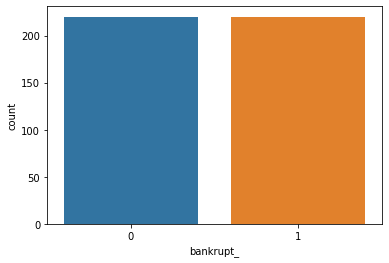

In [14]:
sns.countplot(bankruptcy_subdf["bankrupt_"])

220 randomly selected non bankruptcy companies were selected against 220 bankrupt companies.

# **4. Feature Engineering**

In [15]:
bankruptcy_subdf2 = bankruptcy_subdf.drop(["net_income_flag"],axis=1)
bankruptcy_subdf2.shape

(440, 95)

## **4.1 Correlation Matrix**

<AxesSubplot:>

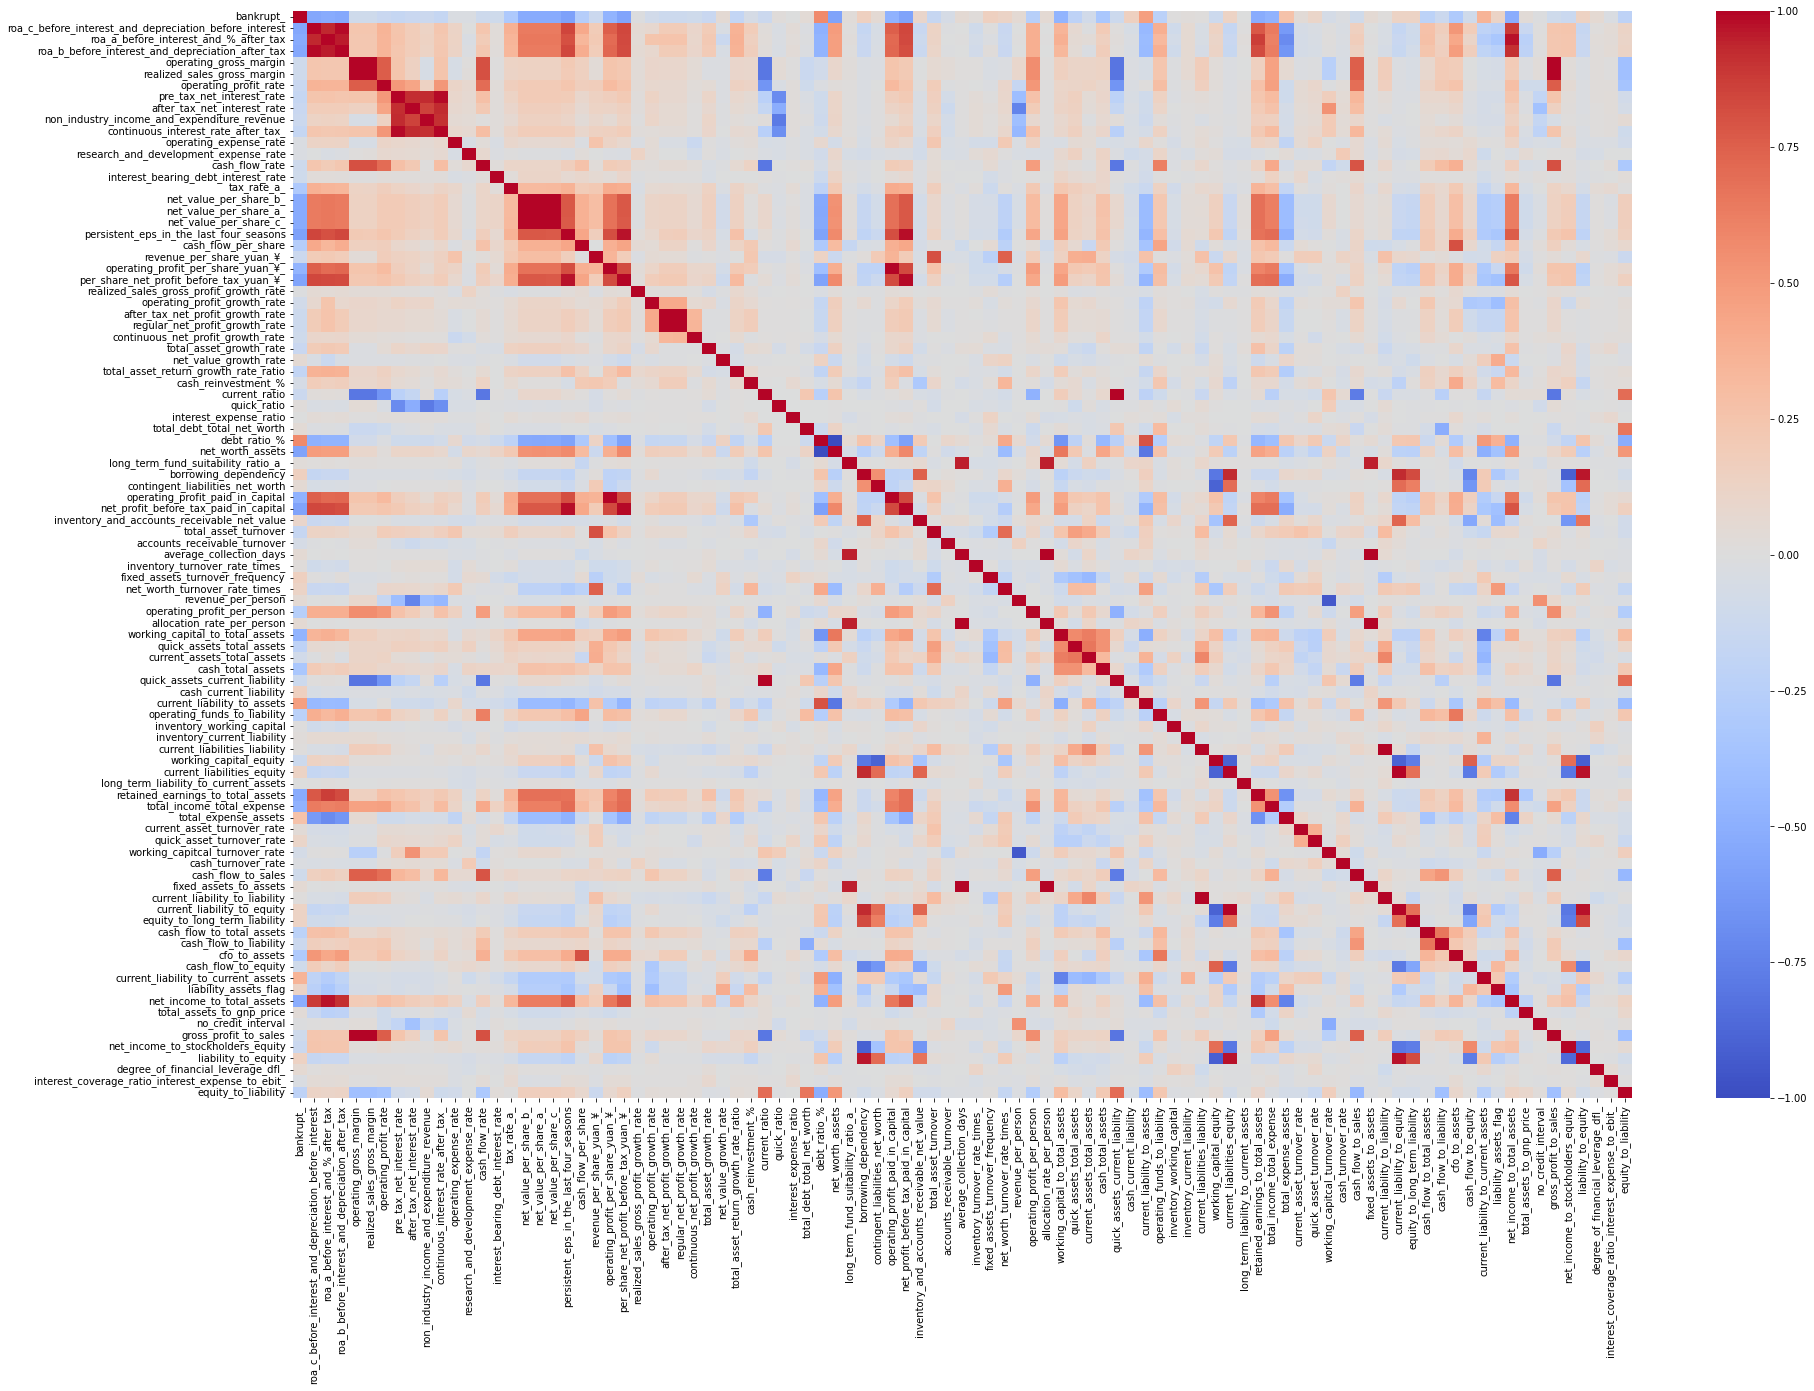

In [16]:
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(bankruptcy_subdf2.corr(),ax=ax1,cmap="coolwarm")

### **4.1.1 IDENTIFY HIGHEST FEATURES CORRELATED TO BANKRUPTCY**

Based on fundamental understanding of businesses that go bankrupt are few assets, high debt, low profitability and low cash flow. Can look in this direction

In [17]:
corr=bankruptcy_subdf2[bankruptcy_subdf2.columns[:-1]].corr()['bankrupt_'][:]

corr_df = pd.DataFrame(corr)

print("Correlations to Bankruptcy:")
for index, row in corr_df["bankrupt_"].iteritems():
    if row!=1.0 and row>=0.5:
        print(f'Positive Correlation: {index}')
    elif row!=1.0 and row<=-0.5:
        print(f'Negative Correlation: {index}')

Correlations to Bankruptcy:
Negative Correlation: roa_c_before_interest_and_depreciation_before_interest
Negative Correlation: roa_a_before_interest_and_%_after_tax
Negative Correlation: roa_b_before_interest_and_depreciation_after_tax
Negative Correlation: net_value_per_share_b_
Negative Correlation: net_value_per_share_a_
Negative Correlation: net_value_per_share_c_
Negative Correlation: persistent_eps_in_the_last_four_seasons
Negative Correlation: per_share_net_profit_before_tax_yuan_¥_
Positive Correlation: debt_ratio_%
Negative Correlation: net_worth_assets
Negative Correlation: net_profit_before_tax_paid_in_capital
Negative Correlation: retained_earnings_to_total_assets
Negative Correlation: net_income_to_total_assets


**Description of what these features represent**

roa_c_before_interest_and_depreciation_before_interest: Return on total assets- if return on total assets is low, higher risk of bankruptcy\
roa_a_before_interest_and_after_tax: Return on total assets- if return on total assets is low, higher risk of bankruptcy\
roa_b_before_interest_and_depreciation_after_tax: Return on total assets- if return on total assets is low, higher risk of bankruptcy\
debt_ratio: Liability over total assets - higher the value, the higher amount of debt over assets, which leads to higher risk of bankruptcy\
net_worth_assets: Lesser net assets, higher risk of bankruptcy\
retained_earnings_to_total_assets: Lesser earning retained higher risk of bankruptcy\
total_income_total_expense: Lower amount of income to expenses, higher risk of bankruptcy\
net_income_to_total_assets: Lower amount of net income results in higher risk of bankruptcy\

Features seems to agree with background knowledge on issues that will lead to companies defaulting

## **Visualtion of Distribution of All Features After Sub-Sampling**

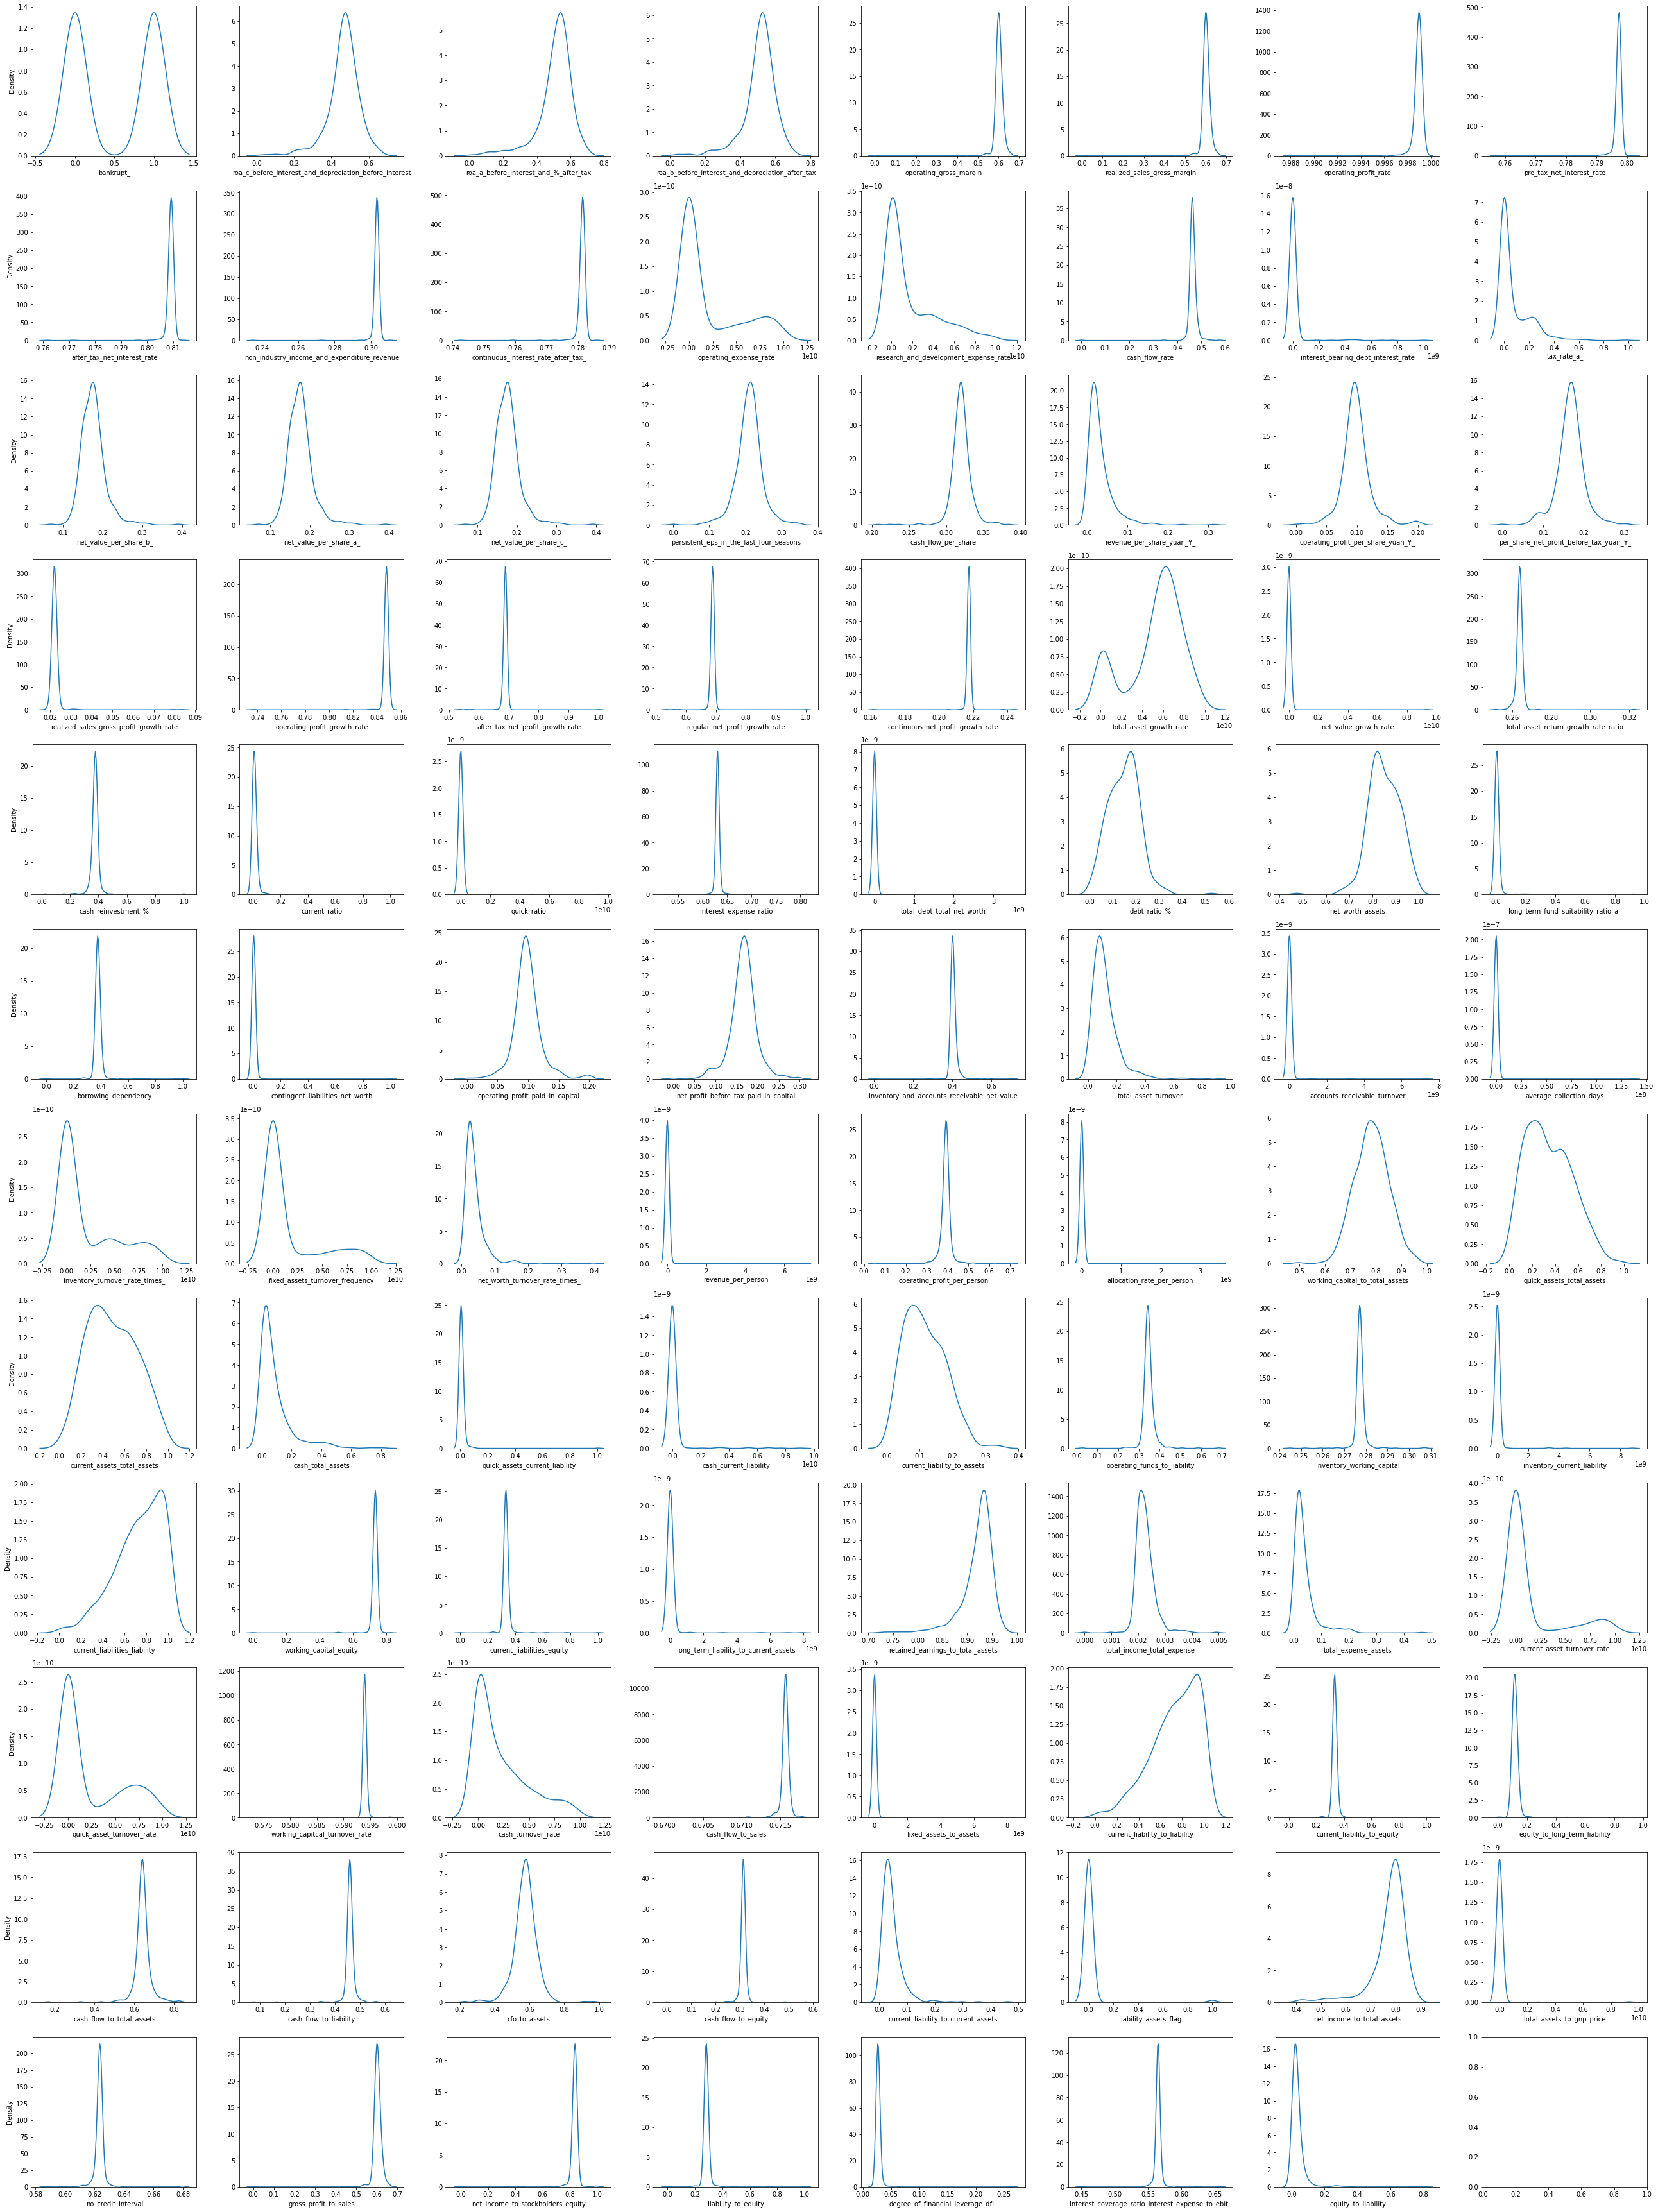

In [18]:
# Visualisation of distributions after sub-sampling
cols = list(bankruptcy_subdf2.columns)
ncols = 8
nrows = math.ceil(len(cols) / ncols)

fig, ax = plt.subplots(nrows, ncols, figsize = (4.5 * ncols, 4 * nrows))
for i in range(len(cols)):
    sns.kdeplot(bankruptcy_subdf2[cols[i]], ax = ax[i // ncols, i % ncols])
    if i % ncols != 0:
        ax[i // ncols, i % ncols].set_ylabel(" ")
plt.tight_layout()
plt.show()

## **4.3 Boxplot of All Features**

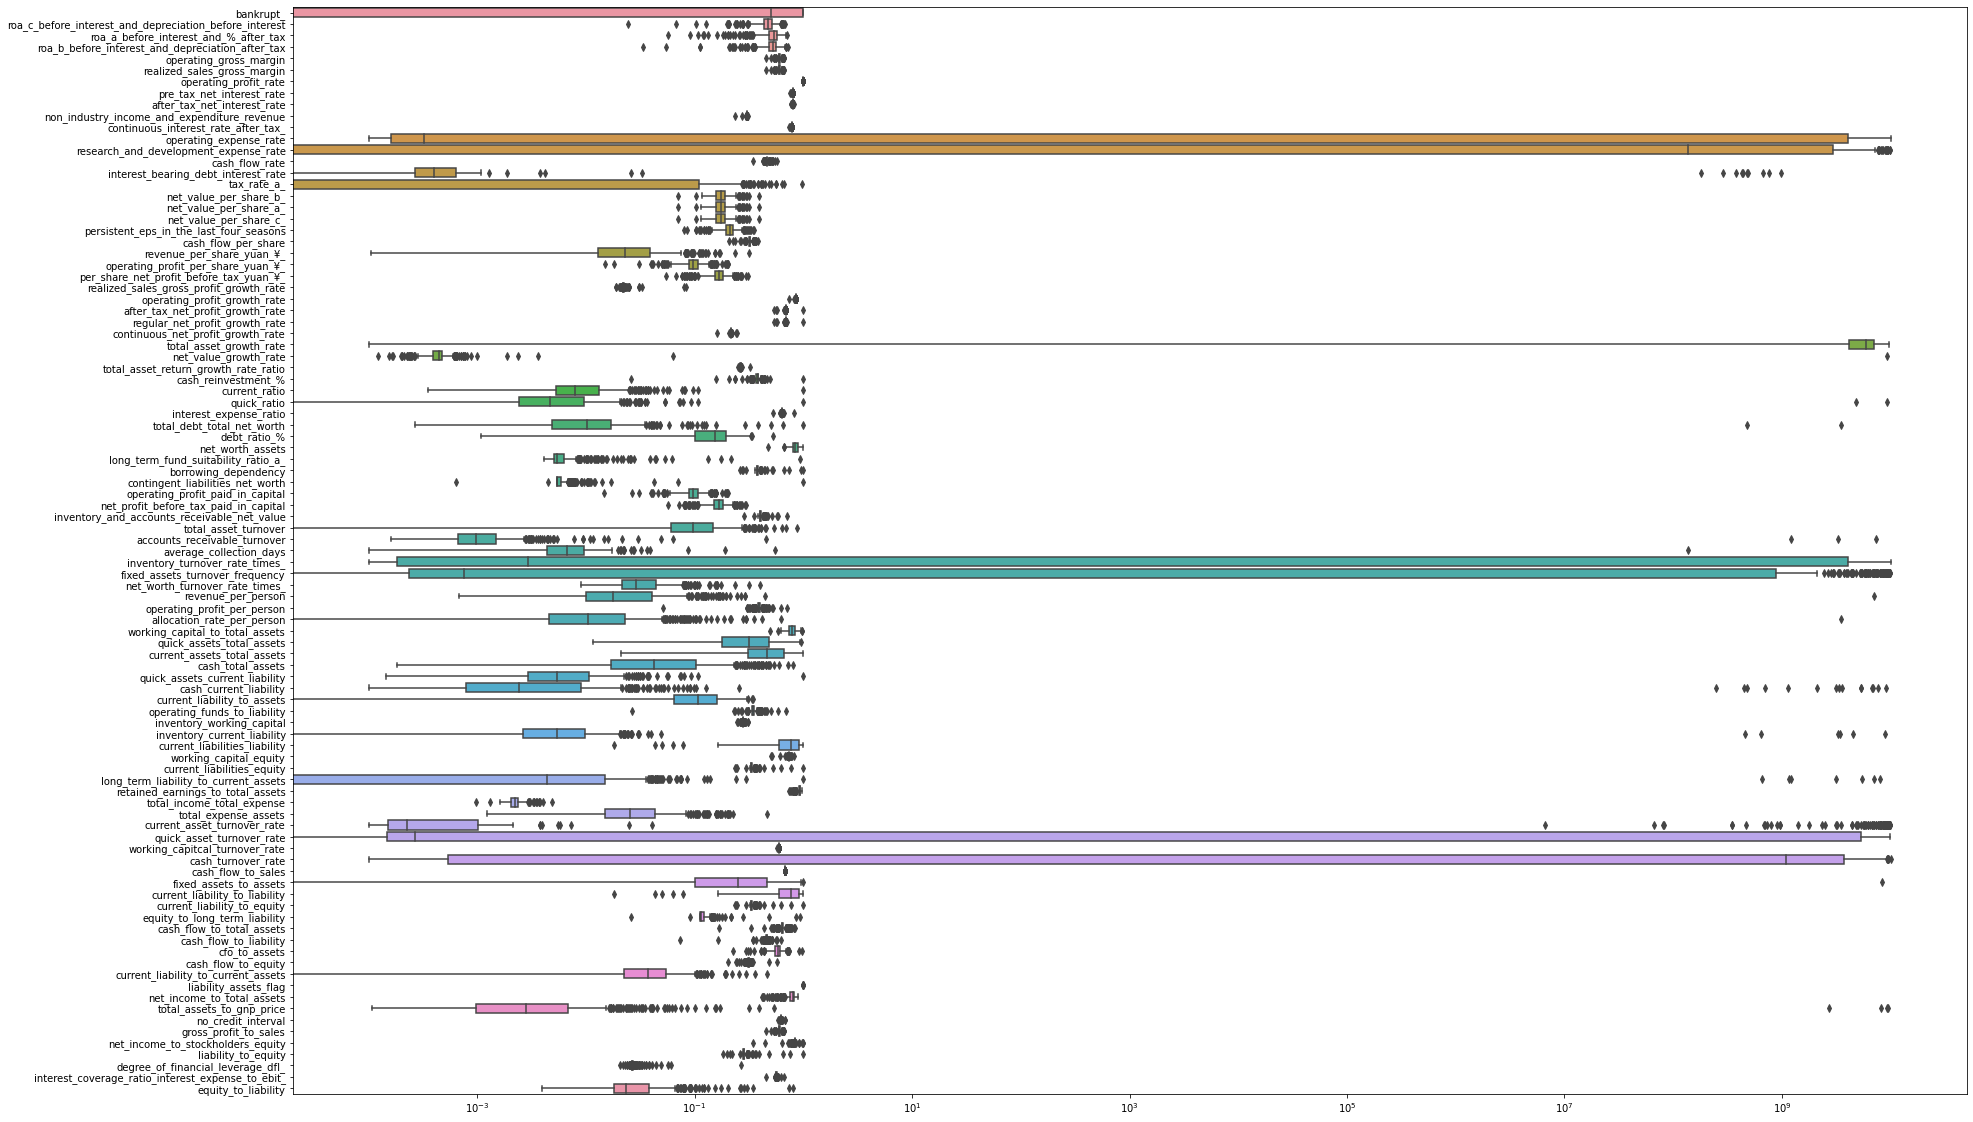

In [19]:
plt.figure(figsize=(30,20))
boxplot=sns.boxplot(data=bankruptcy_subdf2,orient="h")
boxplot.set(xscale="log")
plt.show()

## **4.4 Drop Outliers**

In [20]:
quartile1 = bankruptcy_subdf2.quantile(q=0.25,axis=0)
# display(quartile1)
quartile3 = bankruptcy_subdf2.quantile(q=0.75,axis=0)
# display(quartile3)
IQR = quartile3 -quartile1
lower_limit = quartile1-1.5*IQR
upper_limit = quartile3+1.5*IQR

lower_limit = lower_limit.drop(["bankrupt_"])
upper_limit = upper_limit.drop(["bankrupt_"])
# print(lower_limit)
# print(" ")
# print(upper_limit)

bankruptcy_subdf2_out = bankruptcy_subdf2[((bankruptcy_subdf2<lower_limit) | (bankruptcy_subdf2>upper_limit)).any(axis=1)]
display(bankruptcy_subdf2_out.shape)
display(bankruptcy_subdf2.shape)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  from ipykernel import kernelapp as app


(419, 95)

(440, 95)

In [21]:
bankruptcy_subdf3 = bankruptcy_subdf2_out.copy()
bankruptcy_subdf3

bankrupt_  roa_c_before_interest_and_depreciation_before_interest  \
4451          0                                           0.525033        
1870          1                                           0.277726        
5858          0                                           0.548871        
1089          0                                           0.561303        
5760          0                                           0.581192        
...         ...                                                ...        
6591          1                                           0.418515        
4             1                                           0.465022        
1376          0                                           0.566080        
5427          0                                           0.528007        
3596          1                                           0.480915        

      roa_a_before_interest_and_%_after_tax  \
4451                               0.593109   
1870                               0.314708   
5858                               0.613389   
1089                               0.603740   
5760                               0.638519   
...                                     ...   
6591                               0.433984   
4                                  0.538432   
1376                               0.590384   
5427                               0.579154   
3596                               0.546936   

      roa_b_before_interest_and_depreciation_after_tax  \
4451                                          0.580010   
1870                                          0.307351   
5858                                          0.605439   
1089                                          0.601852   
5760                                          0.618502   
...                                                ...   
6591                                          0.461427   
4                                             0.522298   
1376                                          0.613630   
5427                                          0.572996   
3596                                          0.529097   

      operating_gross_margin  realized_sales_gross_margin  \
4451                0.599519                     0.599713   
1870                0.596621                     0.596650   
5858                0.599324                     0.599338   
1089                0.613867                     0.613838   
5760                0.614696                     0.614847   
...                      ...                          ...   
6591                0.612750                     0.612750   
4                   0.598783                     0.598783   
1376                0.613543                     0.613543   
5427                0.609522                     0.609298   
3596                0.596722                     0.596708   

      operating_profit_rate  pre_tax_net_interest_rate  \
4451               0.998999                   0.797493   
1870               0.998976                   0.797176   
5858               0.999018                   0.797519   
1089               0.999200                   0.797639   
5760               0.999147                   0.797635   
...                     ...                        ...   
6591               0.998864                   0.796902   
4                  0.998973                   0.797366   
1376               0.999120                   0.797602   
5427               0.999036                   0.797587   
3596               0.998985                   0.797392   

      after_tax_net_interest_rate  \
4451                     0.809408   
1870                     0.809113   
5858                     0.809431   
1089                     0.809503   
5760                     0.809500   
...                           ...   
6591                     0.808857   
4                        0.809304   
1376                     0.809516   
5427                     0.809458   
3596  

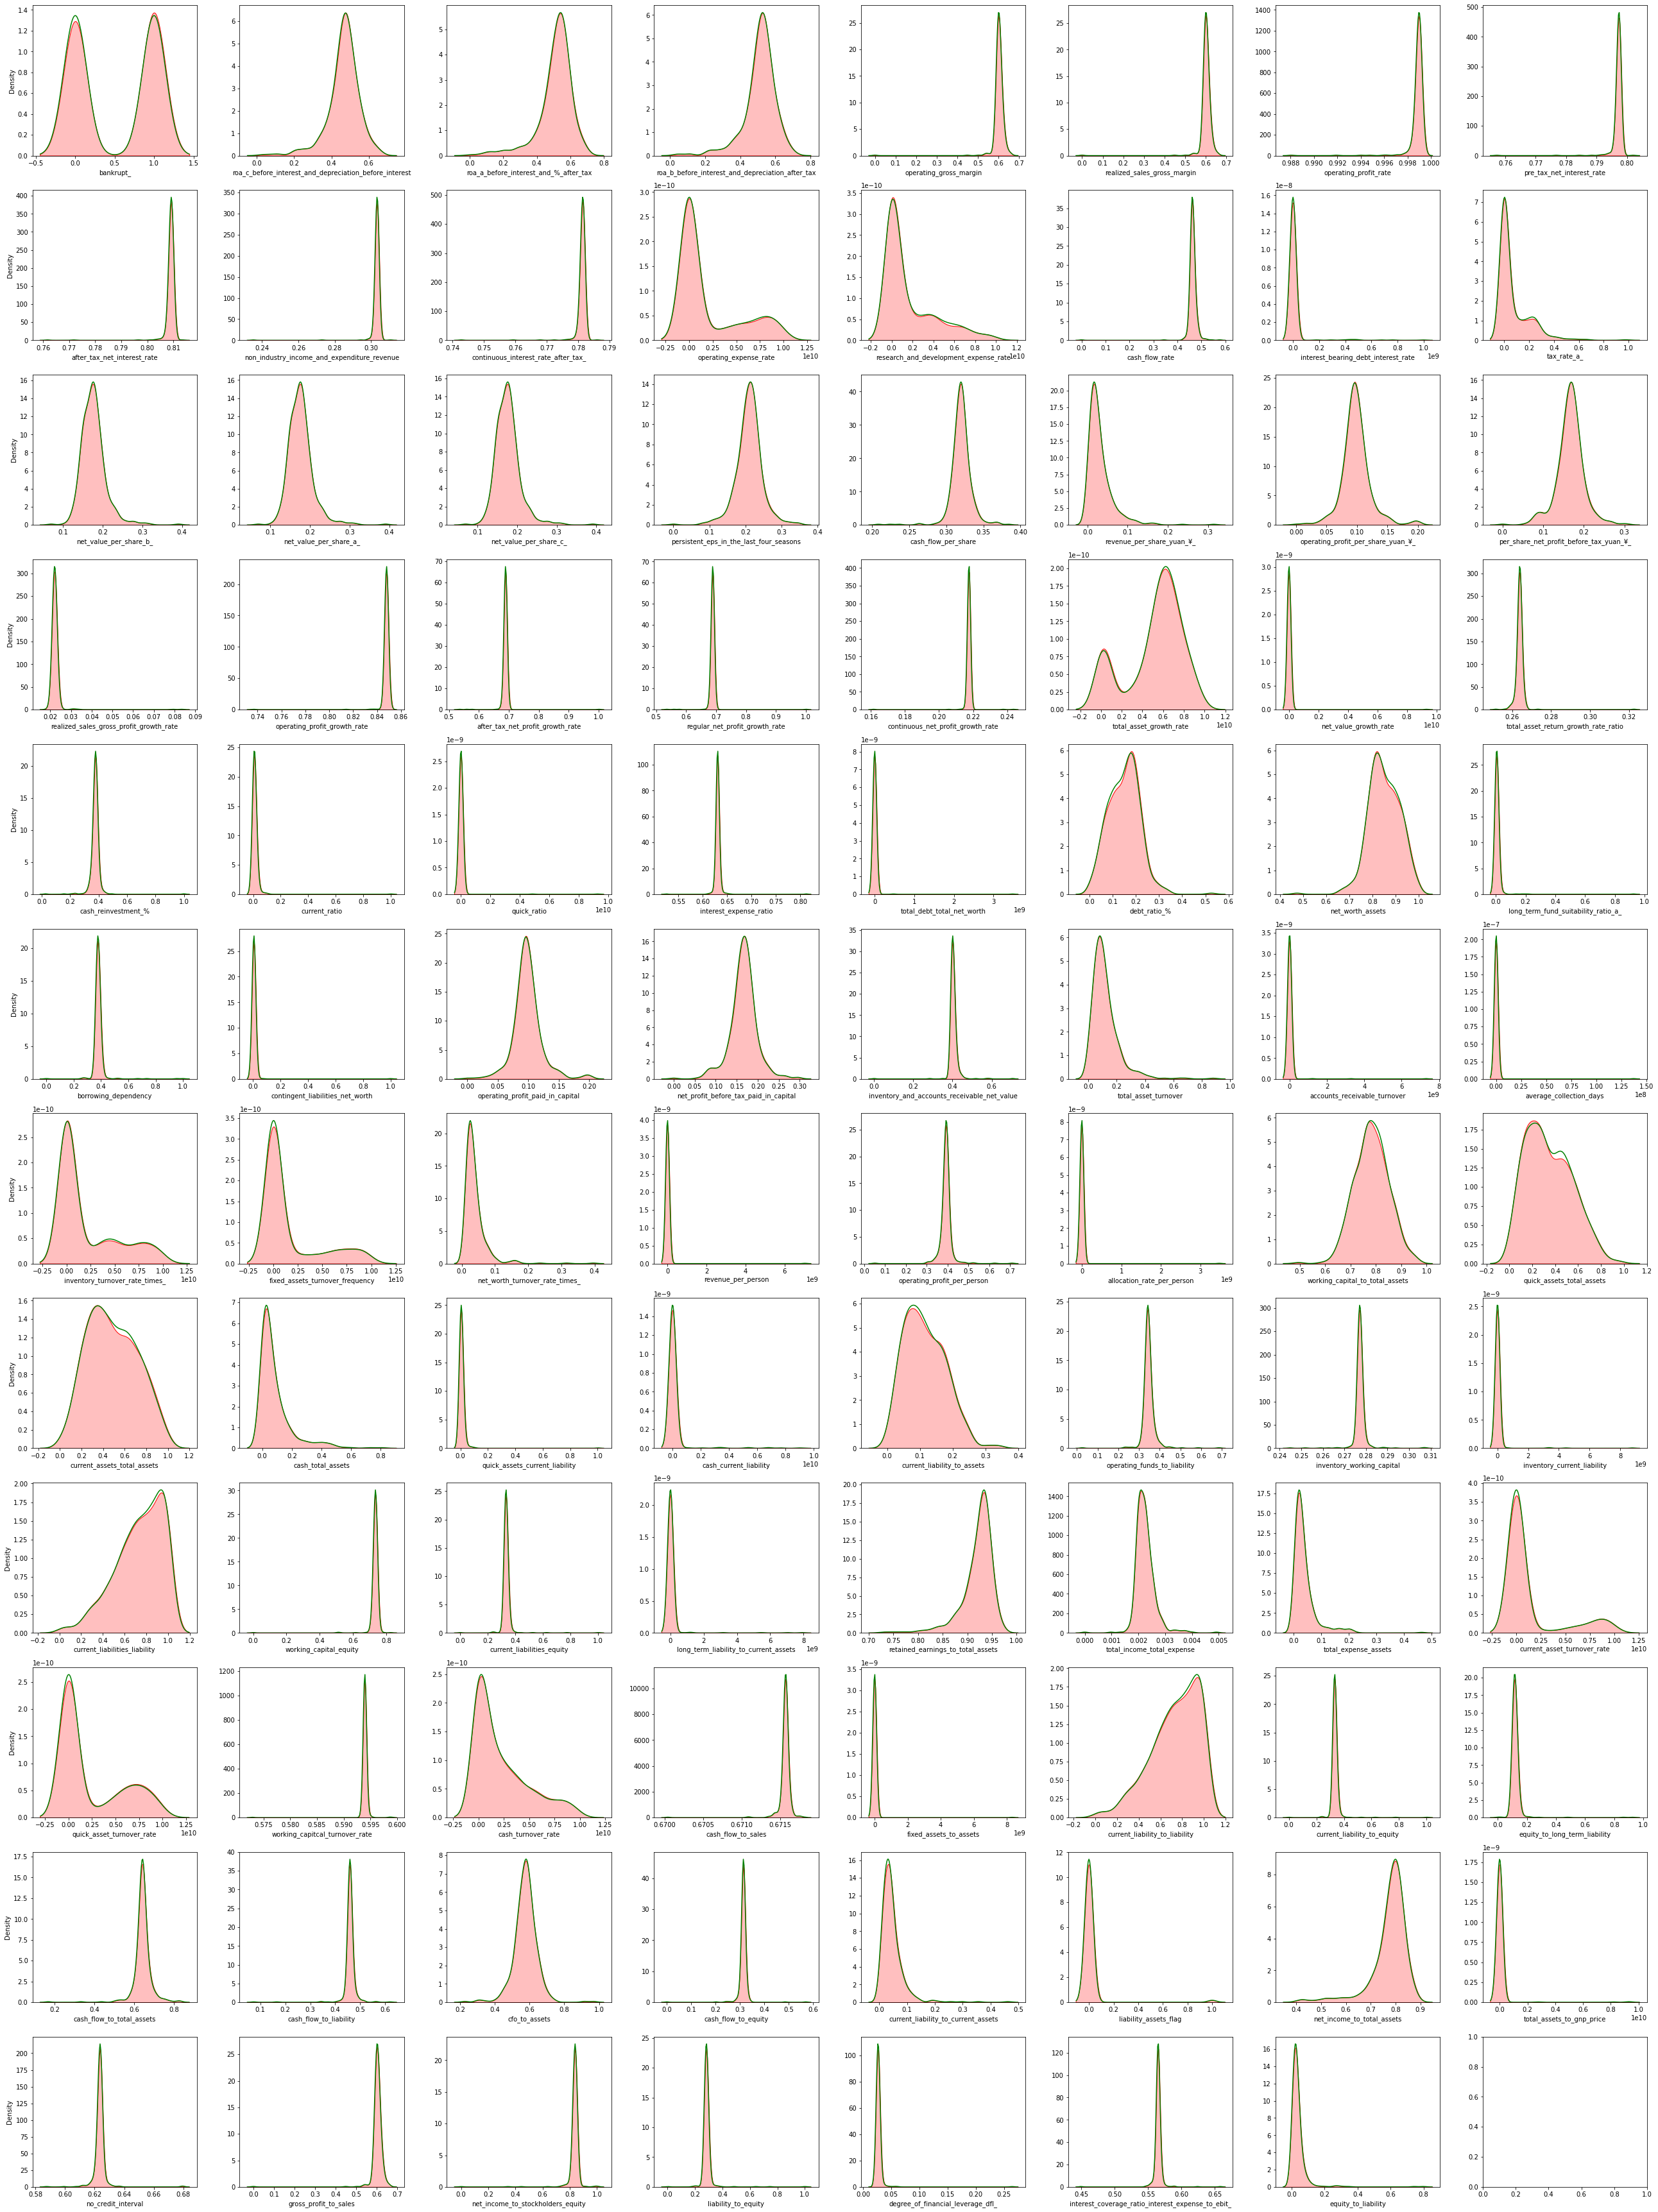

In [22]:
# Visualisation of distributions after sub-sampling after outlier removal
cols = list(bankruptcy_subdf3.columns)
ncols = 8
nrows = math.ceil(len(cols) / ncols)

fig, ax = plt.subplots(nrows, ncols, figsize = (4.5 * ncols, 4 * nrows))
for i in range(len(cols)):
    sns.kdeplot(bankruptcy_subdf3[cols[i]], ax = ax[i // ncols, i % ncols],fill=True,color="red")
    sns.kdeplot(bankruptcy_subdf2[cols[i]], ax = ax[i // ncols, i % ncols],color="green")
    if i % ncols != 0:
        ax[i // ncols, i % ncols].set_ylabel(" ")
plt.tight_layout()
plt.show()

# **5.0 Data Preprocessing**

## 5.1 Feature Encoding

All categoricals already encoded in base data

## **5.2 Log Transformation**

To distribute the data, removing skews

In [23]:
# Log transform to remove skews

target = bankruptcy_subdf3['bankrupt_']
bankruptcy_subdf4 = bankruptcy_subdf3.drop(["bankrupt_"],axis=1)

def log_trans(data):
    for col in data:
        skew = data[col].skew()
        if skew>=0.5 or skew<=0.5:
            data[col] = np.log1p(data[col])
        else:
            continue
    return data

bankruptcy_subdf4_log = log_trans(bankruptcy_subdf4)
bankruptcy_subdf4_log.head()

roa_c_before_interest_and_depreciation_before_interest  \
4451                                           0.422016        
1870                                           0.245082        
5858                                           0.437527        
1089                                           0.445520        
5760                                           0.458179        

      roa_a_before_interest_and_%_after_tax  \
4451                               0.465688   
1870                               0.273614   
5858                               0.478337   
1089                               0.472338   
5760                               0.493793   

      roa_b_before_interest_and_depreciation_after_tax  \
4451                                          0.457431   
1870                                          0.268003   
5858                                          0.473397   
1089                                          0.471161   
5760                                          0.481501   

      operating_gross_margin  realized_sales_gross_margin  \
4451                0.469703                     0.469824   
1870                0.467890                     0.467908   
5858                0.469581                     0.469590   
1089                0.478633                     0.478615   
5760                0.479147                     0.479240   

      operating_profit_rate  pre_tax_net_interest_rate  \
4451               0.692647                   0.586393   
1870               0.692635                   0.586217   
5858               0.692656                   0.586408   
1089               0.692747                   0.586474   
5760               0.692721                   0.586472   

      after_tax_net_interest_rate  \
4451                     0.593000   
1870                     0.592837   
5858                     0.593012   
1089                     0.593052   
5760                     0.593050   

      non_industry_income_and_expenditure_revenue  \
4451                                     0.265162   
1870                                     0.264775   
5858                                     0.265167   
1089                                     0.265035   
5760                                     0.265115   

      continuous_interest_rate_after_tax_  ...  liability_assets_flag  \
4451                             0.577555  ...               0.000000   
1870                             0.577377  ...               0.693147   
5858                             0.577571  ...               0.000000   
1089                             0.577619  ...               0.000000   
5760                             0.577600  ...               0.000000   

      net_income_to_total_assets  total_assets_to_gnp_price  \
4451                    0.603675                   0.030263   
1870                    0.509713                   0.003226   
5858                    0.607202                   0.005970   
1089                    0.607958                   0.002063   
5760                    0.619374                   0.000645   

      no_credit_interval  gross_profit_to_sales  \
4451            0.484879               0.469700   
1870            0.484443               0.467888   
5858            0.485249               0.469582   
1089            0.484938               0.478631   
5760            0.484985               0.479144   

      net_income_to_stockholders_equity  liability_to_equity  \
4451                           0.611307             0.247116   
1870                           0.643297             0.181623   
5858                           0.611349             0.245764   
1089                           0.611149             0.244465   
5760                           0.611857             0.244477   

      degree_of_financial_leverage_dfl_  \
4451                           0.026465   
1870                           0.026403   
5858                           0.026547   
1089                           0.026455   
5760  

### 5.2.1 Box Plot of Log Transformed Data

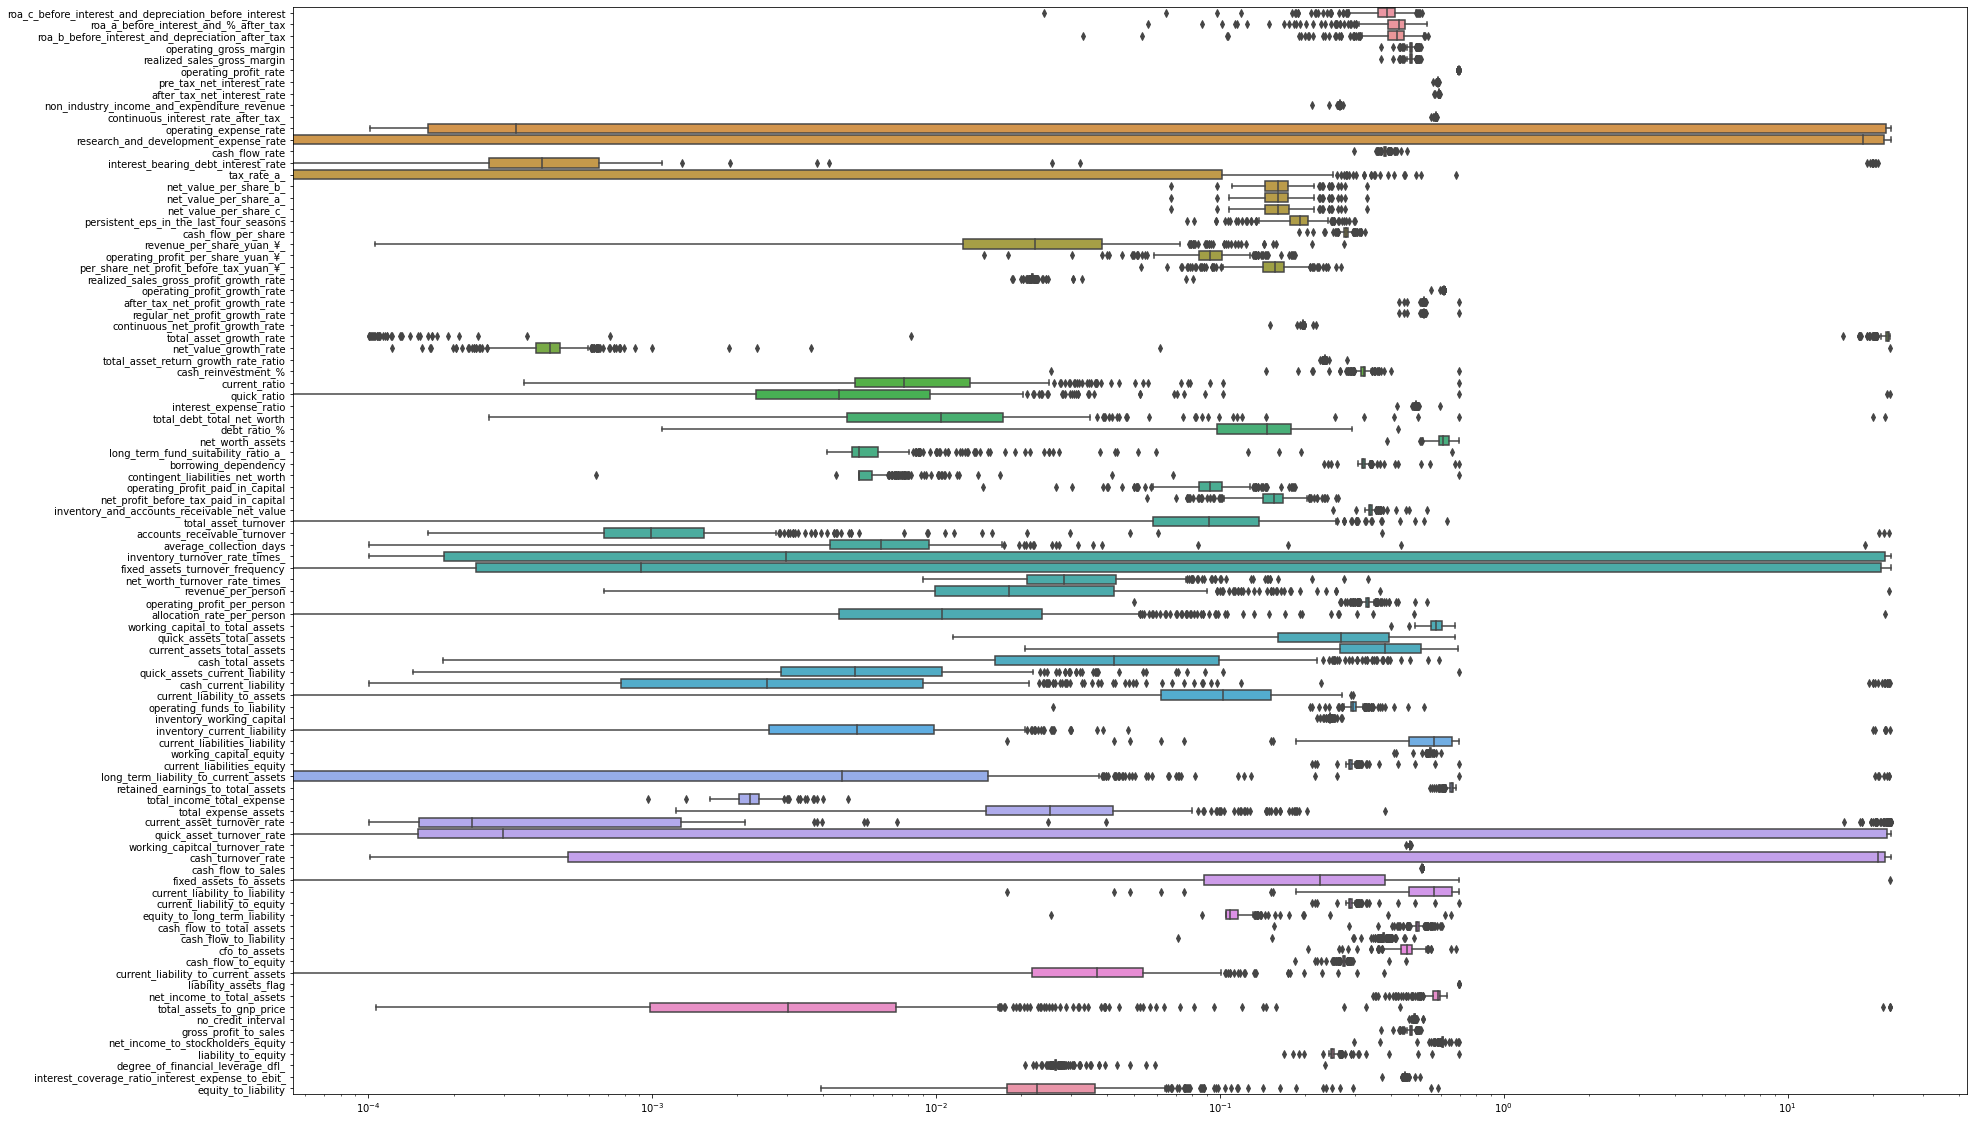

In [24]:
plt.figure(figsize=(30,20))
boxplot=sns.boxplot(data=bankruptcy_subdf4_log,orient="h")
boxplot.set(xscale="log")
plt.show()

### 5.2.2 Distribution of Log Data Visualise

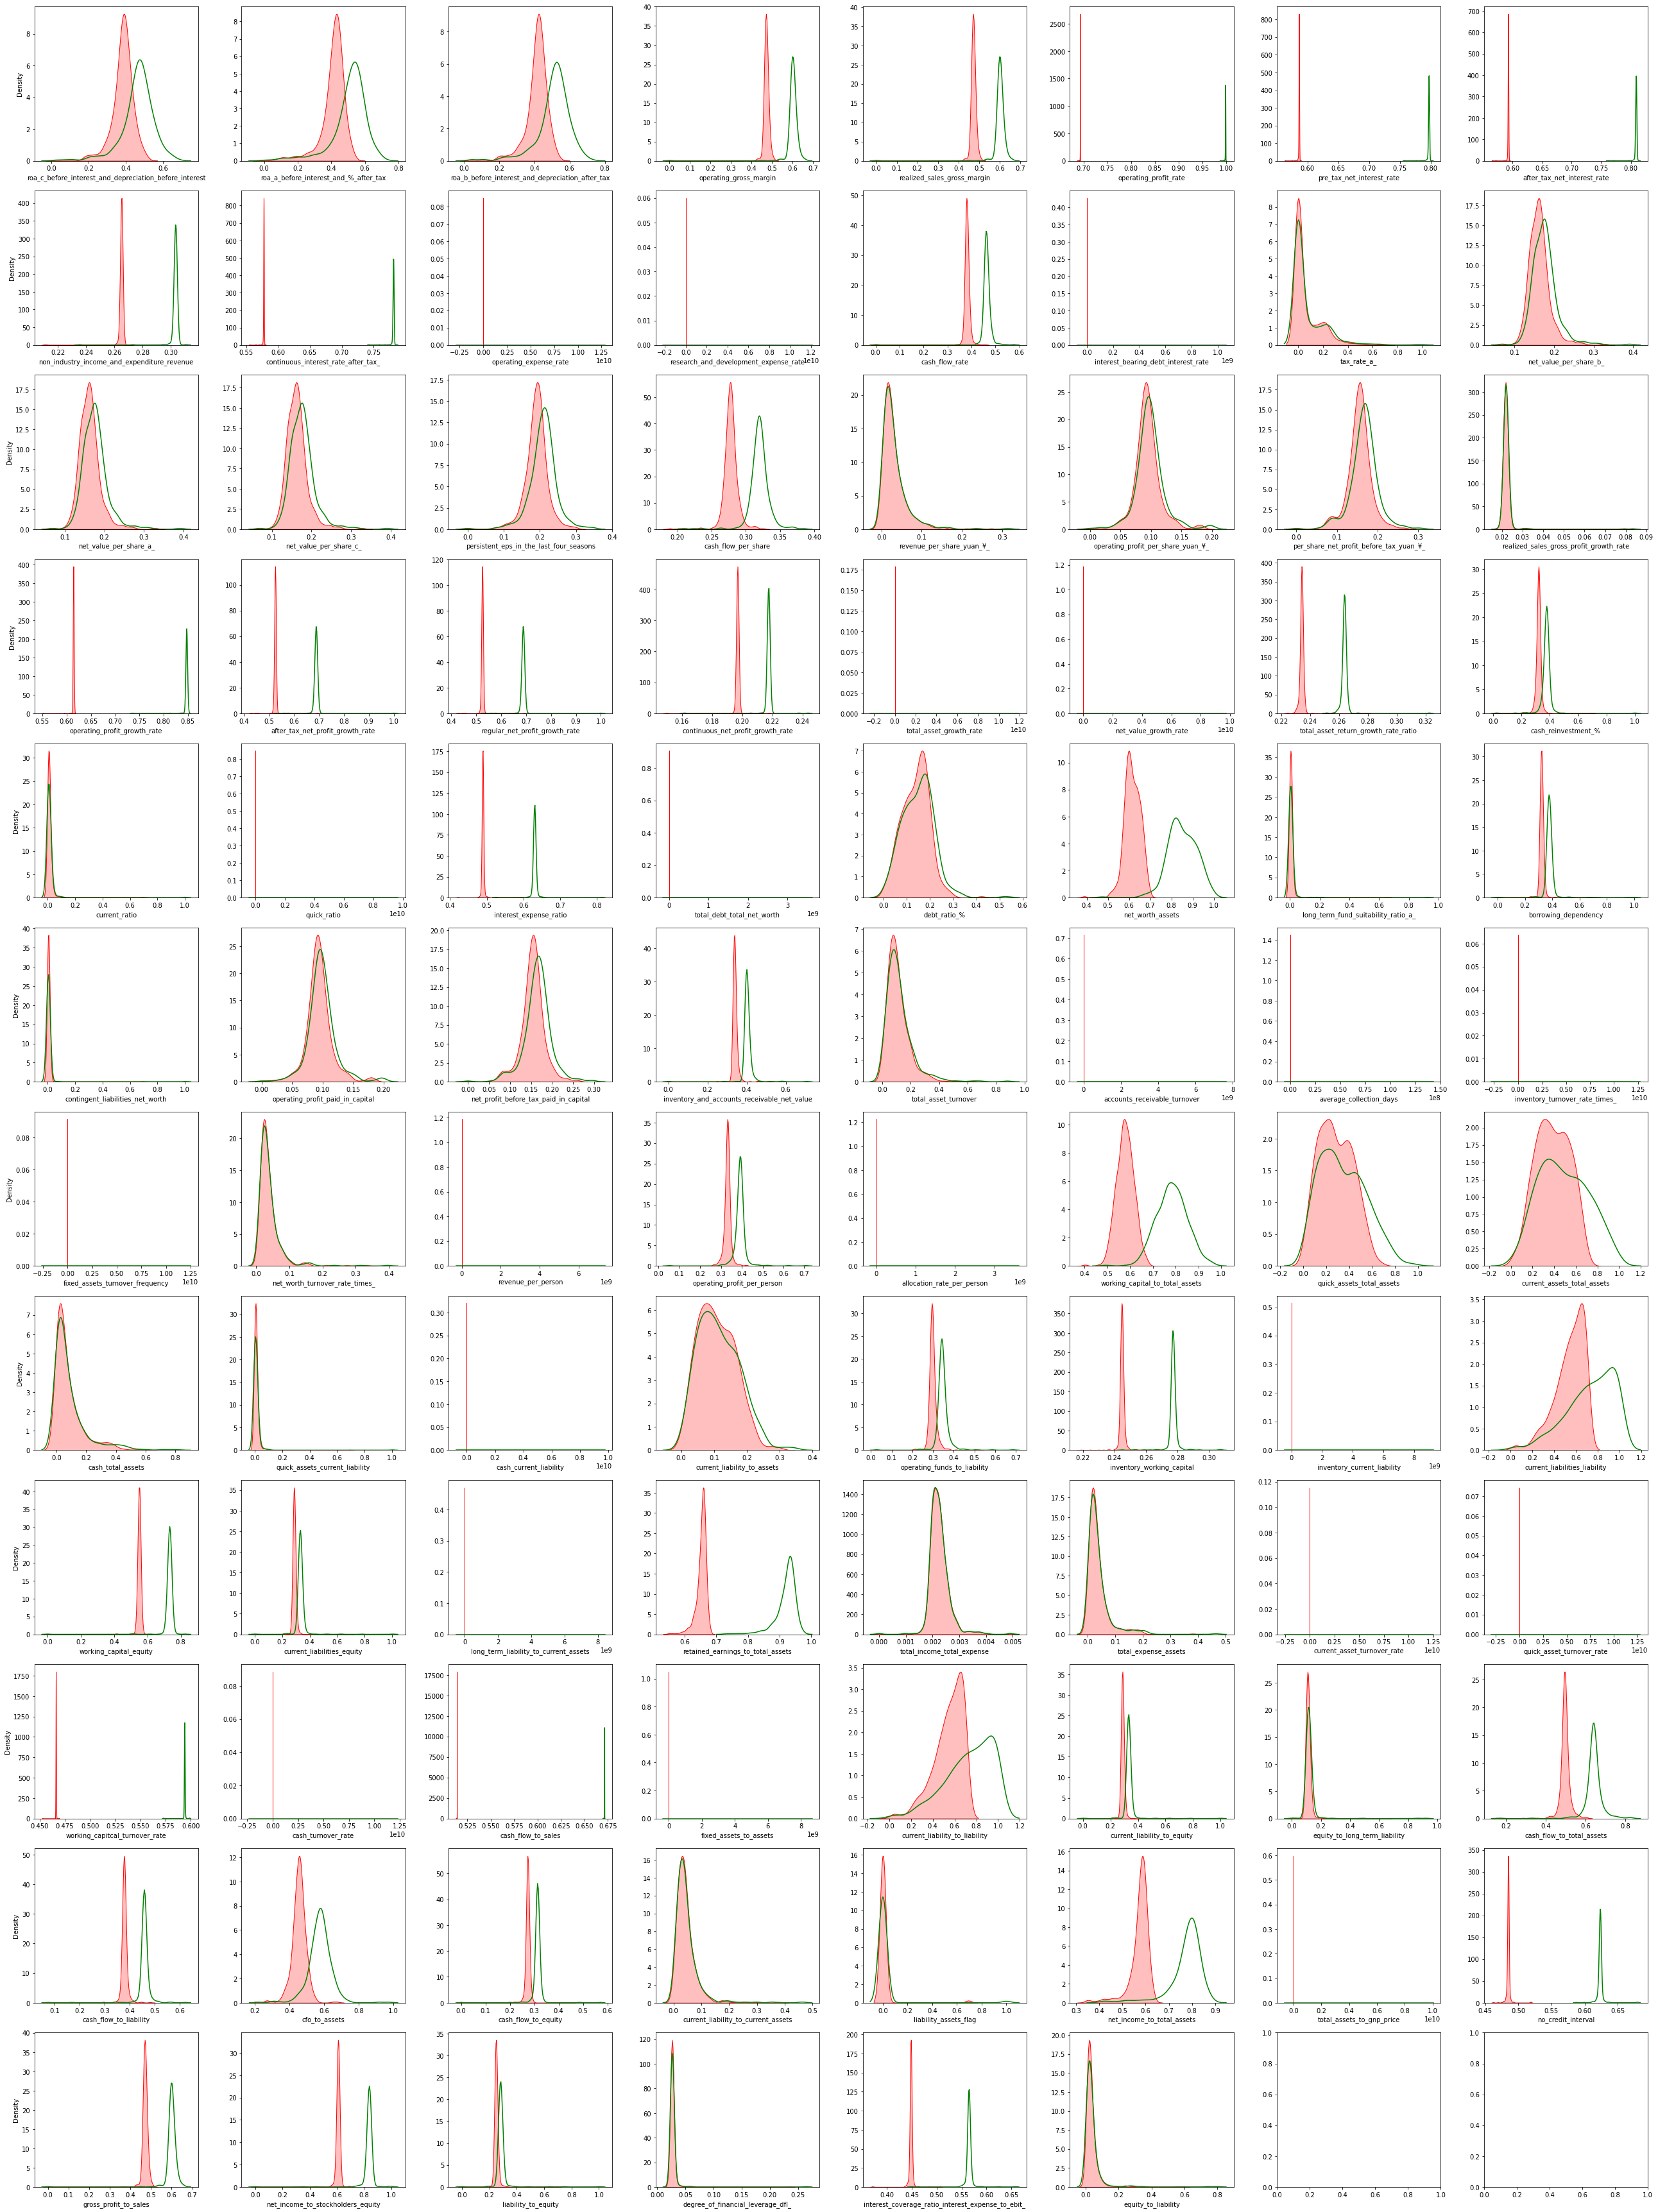

Red represents distributions after log transforms, green represents before log transform


In [25]:
# Visualisation of distributions after sub-sampling after outlier removal and log transform
compare_subdf2 = bankruptcy_subdf2.drop(["bankrupt_"],axis=1)

cols = list(bankruptcy_subdf4.columns)
ncols = 8
nrows = math.ceil(len(cols) / ncols)

fig, ax = plt.subplots(nrows, ncols, figsize = (4.5 * ncols, 4 * nrows))
for i in range(len(cols)):
    sns.kdeplot(bankruptcy_subdf4_log[cols[i]], ax = ax[i // ncols, i % ncols],fill=True,color="red")
    sns.kdeplot(bankruptcy_subdf2[cols[i]], ax = ax[i // ncols, i % ncols],color="green")
    if i % ncols != 0:
        ax[i // ncols, i % ncols].set_ylabel(" ")
plt.tight_layout()
plt.show()
print("Red represents distributions after log transforms, green represents before log transform")

## 5.3 Splitting Train & Test Data

In [26]:
from sklearn.model_selection import train_test_split
x = bankruptcy_subdf4
y = bankruptcy_subdf3["bankrupt_"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(335, 94)
(84, 94)
(335,)
(84,)


# **6.0 Model Building**

In [27]:
pip install -U --ignore-installed --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.5/544.5 kB 841.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.4/134.4 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.8/793.8 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [28]:
from pycaret.classification import *
exp_name = setup(data = bankruptcy_subdf4,  target = bankruptcy_subdf3["bankrupt_"])

In [29]:
compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=8341, verbose=0, warm_start=False)

Pycaret showed the 3 models with the highest accuracies are
* Light Gradient Boosting Machine
* Gradient Boosting Classifier
* Extreme Gradient Boosting

Will use these 5 models for hyperparameter tuning

## 6.1 Cross-Validation for Selected Models

In [30]:
print("LGBM Model")
lgb_clf = create_model("lightgbm")
lgb_clf_scoregrid = pull()

LGBM Model


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
print("GBC Model")
gbc_clf = create_model("gbc")
gbc_clf_scoregrid = pull()

GBC Model


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
print("XGB Model")
xgb_clf = create_model("xgboost")
xgb_clf_scoregrid = pull()

XGB Model


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **7.0 Hyperparameter Tuning**

In [33]:
print("Before Tuning")
print(lgb_clf_scoregrid.loc[["Mean","Std"]])
print("")
lgb_clf = tune_model(lgb_clf,choose_better=True)
print(lgb_clf)

Before Tuning
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.8329  0.9112  0.8608  0.8343  0.8429  0.6649  0.6735
Std     0.0490  0.0615  0.0555  0.0824  0.0386  0.0991  0.0921



Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.

In [34]:
print("Before Tuning")
print(gbc_clf_scoregrid.loc[["Mean","Std"]])
print("")
gbc_clf = tune_model(gbc_clf,choose_better=True)
print(gbc_clf)

Before Tuning
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.8328  0.9037  0.8608  0.8389  0.8431  0.6642  0.6762
Std     0.0442  0.0691  0.0630  0.0956  0.0322  0.0903  0.0874



Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_samples_leaf=1,
                           min_samples_split=9, min_weight_fraction_leaf=0.0,
                           n_estimators=190, n_iter_no_change=None,
                           random_state=8341, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [35]:
print("Before Tuning")
print(xgb_clf_scoregrid.loc[["Mean","Std"]])
print("")
xgb_clf = tune_model(xgb_clf,choose_better = True)
print(xgb_clf)

Before Tuning
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.8397  0.9041  0.8738  0.8323  0.8490  0.6784  0.6858
Std     0.0432  0.0545  0.0633  0.0686  0.0396  0.0868  0.0827



Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=110,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=8341, reg_alpha=1, ...)


## 7.1 Ensembling Model
1. Bagged Method
1. Boosted Method

In [36]:
# Original
print(lgb_clf_scoregrid.loc[['Mean', 'Std']])

# Compare the original against bagged and boosted

# Bagged
lgb_clf = ensemble_model(lgb_clf,fold =5,choose_better = True)
# Boosted
lgb_clf = ensemble_model(lgb_clf,method="Boosting",choose_better = True)

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.8329  0.9112  0.8608  0.8343  0.8429  0.6649  0.6735
Std     0.0490  0.0615  0.0555  0.0824  0.0386  0.0991  0.0921


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


Processing:   0%|          | 0/6 [00:00<?, ?it/s]


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will 

In [37]:
# Original
print(gbc_clf_scoregrid.loc[['Mean', 'Std']])

# Compare the original against bagged and boosted

# Bagged
gbc_clf = ensemble_model(gbc_clf,fold =5,choose_better = True)
# Boosted
gbc_clf = ensemble_model(gbc_clf,method="Boosting",choose_better = True)

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.8328  0.9037  0.8608  0.8389  0.8431  0.6642  0.6762
Std     0.0442  0.0691  0.0630  0.0956  0.0322  0.0903  0.0874


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


In [38]:
# Original
print(xgb_clf_scoregrid.loc[['Mean', 'Std']])

# Compare the original and boosted against bagged and boosted

# Bagged
xgb_clf = ensemble_model(xgb_clf,fold =5,choose_better = True)
# Boosted
xgb_clf = ensemble_model(xgb_clf,method="Boosting",choose_better = True)

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.8397  0.9041  0.8738  0.8323  0.8490  0.6784  0.6858
Std     0.0432  0.0545  0.0633  0.0686  0.0396  0.0868  0.0827


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


## 7.2 Blend Models

In [39]:
blend_models([lgb_clf, gbc_clf, xgb_clf],choose_better=True)

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=110,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=8341, reg_alpha=1, ...)

# **10. Discussion of results**

# **11. Thoughts on Pycaret**